In [1]:
import math,random
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import operator

In [2]:
dataset = pd.read_csv('datasets/Seed_Data.csv',header=None)
data=dataset.iloc[1:,:7]
data

,0,1,2,3,4,5,6
1,15.26,14.84,0.871,5.763,3.312,2.221,5.22
2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
3,14.29,14.09,0.905,5.291,3.337,2.699,4.825
4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
5,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
6,14.38,14.21,0.8951,5.386,3.312,2.462,4.956
7,14.69,14.49,0.8799,5.563,3.259,3.586,5.219
8,14.11,14.1,0.8911,5.42,3.302,2.7,5
9,16.63,15.46,0.8747,6.053,3.465,2.04,5.877
10,16.44,15.25,0.888,5.884,3.505,1.969,5.533


In [3]:
from sklearn.preprocessing import normalize
data = normalize(data)
data

array([[0.66271789, 0.64447795, 0.03782617, ..., 0.14383497, 0.09645455,
        0.22669642],
       [0.66410726, 0.65027169, 0.03932425, ..., 0.14875467, 0.04543422,
        0.22119056],
       [0.65688362, 0.64769001, 0.0416011 , ..., 0.15339543, 0.1240678 ,
        0.2217959 ],
       ...,
       [0.59378277, 0.6144752 , 0.03995888, ..., 0.14538681, 0.37403816,
        0.22743679],
       [0.60059997, 0.67009507, 0.04322392, ..., 0.14385993, 0.1825134 ,
        0.25586371],
       [0.59752179, 0.64804396, 0.04218601, ..., 0.14447397, 0.27383987,
        0.24595552]])

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

siluet = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(data)
    labels = kmeans.predict(data)
    C = kmeans.cluster_centers_
    score = silhouette_score(data, labels)
    siluet.append(score)
    print("Saat k =",i,"nilai score ",score)

Saat k = 2 nilai score  0.5014485204560788
Saat k = 3 nilai score  0.36029385561045935
Saat k = 4 nilai score  0.3801962457143709
Saat k = 5 nilai score  0.37551905950032066
Saat k = 6 nilai score  0.36196745212852144
Saat k = 7 nilai score  0.36217136652058546
Saat k = 8 nilai score  0.3363110155581088
Saat k = 9 nilai score  0.34480253893522395


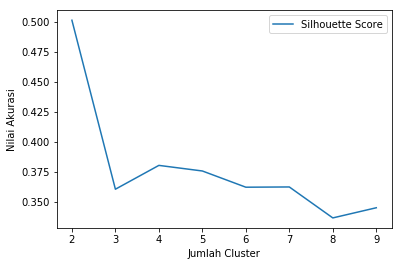

In [5]:
plt.plot([2,3,4,5,6,7,8,9], siluet, label = 'Silhouette Score')

plt.xlabel('Jumlah Cluster')
plt.ylabel('Nilai Akurasi')
plt.legend()
plt.show()